In [38]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [39]:
data=pd.read_csv(r'train.csv',index_col=0,encoding='utf 8')

In [3]:
data.head()

,heartbeat_signals,label
id,,
0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0


In [4]:
data.shape

(100000, 2)

In [5]:
for i in data.loc[:10,'heartbeat_signals']:
    print(len(i.split(',')))

205
205
205
205
205
205
205
205
205
205
205


In [6]:
data_split=[]
for i in data.loc[:,'heartbeat_signals']:
    data_split.append(i.split(','))

In [7]:
len(data_split)

100000

In [8]:
data_split=np.array(data_split)

In [9]:
data_split[:,0]

array(['0.9912297987616655', '0.9714822034884503', '1.0', ...,
       '0.9258351628306013', '1.0', '0.9259994004527861'], dtype='<U22')

In [10]:
Data=data.copy()
for i in range(205):
    Data.loc[:,str(i)]=data_split[:,i]

In [11]:
Data.drop('heartbeat_signals',inplace=True,axis=1)

In [12]:
Data.head()

,label,0,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,204
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.9912297987616655,0.9435330436439665,0.7646772997256593,0.6185708990212999,0.3796321642826237,0.19082233510621885,0.040237131594430715,0.02599520771717858,0.03170886048677242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.9714822034884503,0.9289687459588268,0.5729328050711678,0.1784566262750076,0.1229615224365985,0.13236021729815928,0.09439236984499814,0.08957535516351411,0.030480606866741047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,0.9591487564065292,0.7013782792997189,0.23177753487886463,0.0,0.08069805776387916,0.12837603937503544,0.18744837555079963,0.28082571505275855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.9757952826275774,0.9340884687738161,0.6596366611990001,0.2499208267606008,0.23711575621286213,0.28144491730834825,0.2499208267606008,0.2499208267606008,0.24139674778512604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.055816398940721094,0.26129357194994196,0.35984696254197834,0.43314263962884686,0.45369772898632504,0.49900406742109477,0.5427959768500487,0.6169044962835193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 206 entries, label to 204
dtypes: float64(1), object(205)
memory usage: 157.9+ MB


In [14]:
#字符转数字
for i in range(205):
    Data.loc[:,str(i)]=pd.to_numeric(Data.loc[:,str(i)],errors='coerce')

In [15]:
Data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,label,0,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,204
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.856960,0.877481,0.775979,0.517597,0.325231,0.302762,0.304540,0.292635,0.281425,0.269763,...,0.008361,0.007753,0.007199,0.006945,0.006638,0.006209,0.005884,0.005493,0.005153,0.004944
std,1.217084,0.257405,0.233363,0.242027,0.258848,0.228784,0.216834,0.219299,0.212661,0.199465,...,0.061939,0.059616,0.057399,0.055720,0.055043,0.053221,0.051867,0.049825,0.048203,0.047093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.001124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.645656,0.529757,0.157006,0.000000,0.059871,0.072150,0.049095,0.038288,0.037061,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.912920,0.694979,0.346325,0.096215,0.129880,0.134570,0.112183,0.101003,0.100577,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.984183,0.859450,0.548674,0.282587,0.237989,0.245801,0.226516,0.233740,0.235317,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.932886,0.685619,0.519297,0.431341,0.443234,0.450344,0.432316,0.396467,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,3.000000,1.000000,0.967924,0.836789,0.690015,0.659289,0.634796,0.608093,0.580164,0.557621,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
Data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).iloc[-1,:].max()

3.0

In [17]:
Data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).iloc[3,:].max()

0.0

In [18]:
Data.groupby(by='label').size()

label
0.0    64327
1.0     3562
2.0    14199
3.0    17912
dtype: int64

### 数据处理

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data=pd.read_csv(r'train.csv',index_col=0,encoding='utf 8')
from sklearn.model_selection import train_test_split
def outputs(inputs):
    data_split=[]
    for i in inputs.loc[:,'heartbeat_signals']:
        data_split.append(i.split(','))
    data_split=np.array(data_split)
    Data=inputs.copy()
    for i in range(205):
        Data.loc[:,str(i)]=data_split[:,i]
    Data.drop('heartbeat_signals',inplace=True,axis=1)
    for i in range(205):
        Data.loc[:,str(i)]=pd.to_numeric(Data.loc[:,str(i)],errors='coerce')
    return Data
Data=outputs(data)
X_train,X_test,Y_train,Y_test = train_test_split(Data.iloc[:,1:],Data.iloc[:,0],test_size=0.3,random_state=0)
for i in [X_train,X_test,Y_train,Y_test]:
    i.index = range(i.shape[0])

### xgboost跑模型

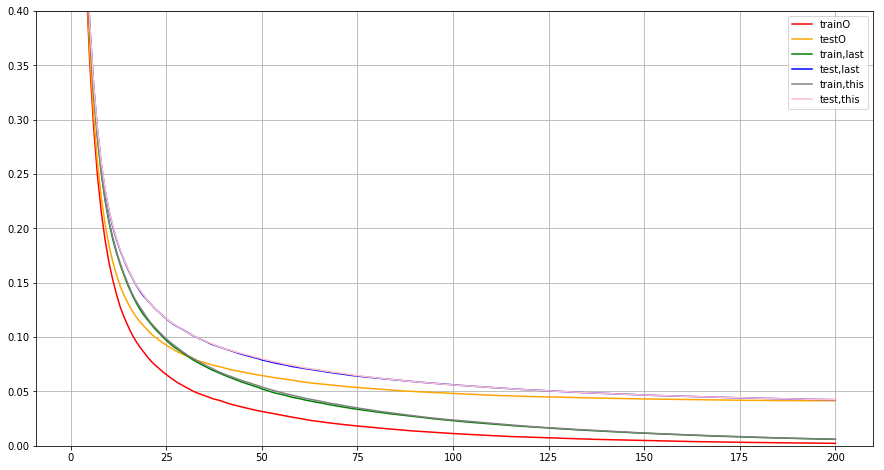

In [13]:
dfull = xgb.DMatrix(X_train,Y_train)
num_round = 200
n_fold=5
param = {'verbosity':2
         , "tree_method":"gpu_hist"  # 使用GPU  
         , "gpu_id": 0# 指定GPU
         , 'objective': 'multi:softmax'  # 目标 
         , "num_class":4  # 指定多分类别数目
         , 'eval_metric':'mlogloss'}
param_1= {'verbosity':2
          , "tree_method":"gpu_hist"  # 使用GPU  
          , "gpu_id": 0# 指定GPU
          , 'objective': 'multi:softmax'  # 目标 
          , "num_class":4  # 指定多分类别数目
          , 'eval_metric':'mlogloss'
          ,"subsample":0.8
          ,"max_depth":5}
param_2= {'verbosity':2
          , "tree_method":"gpu_hist"  # 使用GPU  
          , "gpu_id": 0# 指定GPU
          , 'objective': 'multi:softmax'  # 目标 
          , "num_class":4  # 指定多分类别数目
          , 'eval_metric':'mlogloss'
          ,"subsample":0.8
          ,"max_depth":5
          ,"lambda":2}
cvresult1=xgb.cv(param,dfull,num_round,n_fold)
cvresult2=xgb.cv(param_1,dfull,num_round,n_fold)
cvresult3=xgb.cv(param_2,dfull,num_round,n_fold)
fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=0.4)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="trainO")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="testO")
ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend()
plt.show()

In [3]:
Y_train_2=[]
for  i in Y_train:
    if i == 0:
        Y_train_2.append([1,0,0,0])
    if i == 1:
        Y_train_2.append([0,1,0,0])
    if i == 2:
        Y_train_2.append([0,0,1,0])
    if i == 3:
        Y_train_2.append([0,0,0,1])

### 五层神经网络跑模型

In [4]:
import torch 
from torch import nn
from  torch.utils.data import DataLoader,TensorDataset
import torch.nn.functional as F

x=torch.Tensor(np.array(X_train))
y=torch.Tensor(np.array(Y_train_2))

my_datasets =TensorDataset(x,y)
dataloader = DataLoader(dataset=my_datasets,batch_size=100)


class FourLayerNet(torch.nn.Module):
    def __init__(self):
        super(FourLayerNet,self).__init__() #继承父类
        self.model=nn.Sequential(
            nn.Linear(205, 510),
            nn.BatchNorm1d(510, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(510, 1000),
            nn.BatchNorm1d(1000, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1000,512),
            nn.BatchNorm1d(512, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 128),
            nn.BatchNorm1d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 4),
            nn.Softmax()
        )
    def forward(self,x):
        y_predict=self.model(x)
        return y_predict


model = FourLayerNet()
model = model.cuda()
loss_fn = torch.nn.MSELoss(reduction='sum') 
loss_fn = loss_fn.cuda() 
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001)
for k in range(200):
    for n,(i,j) in enumerate(dataloader):
        x = i.cuda()
        y = j.cuda()
        y_predict = model(x)
        loss =loss_fn(y_predict,y)
        model.zero_grad()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if n%100 == 0:
            print(loss.item())

D:\cn\lib\site-packages\torch\nn\modules\container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


75.65354919433594
35.30402374267578
14.186811447143555
11.352556228637695
26.685178756713867
13.66789436340332
11.853677749633789
15.25519847869873
8.56281566619873
6.575081825256348
4.884963035583496
15.437080383300781
7.054592132568359
8.860526084899902
8.295646667480469
7.068404197692871
5.583195686340332
4.764337539672852
14.426680564880371
4.955513954162598
9.133340835571289
6.832589149475098
5.519377708435059
5.223996162414551
3.8169682025909424
13.082504272460938
3.2196221351623535
8.465032577514648
6.1040544509887695
5.258350372314453
4.675564765930176
3.809699058532715
11.90938663482666
3.3414816856384277
7.212639808654785
5.3848066329956055
4.974249362945557
4.241458892822266
3.3017401695251465
11.591543197631836
3.3196754455566406
7.832134246826172
4.2941508293151855
4.053234577178955
3.615297794342041
2.4763529300689697
11.054430961608887
2.9176828861236572
6.834202766418457
4.215310096740723
4.190852165222168
3.933677911758423
2.7966856956481934
11.063690185546875
2.674807

0.005067594349384308
0.01407840009778738
1.538030982017517
1.595927119255066
1.286409616470337
1.9924498796463013
0.020363012328743935
0.41687899827957153
0.04637651890516281
0.0021657750476151705
2.015474319458008
0.0013285522582009435
1.9311927556991577
0.00037917110603302717
0.22935451567173004
0.0013086890103295445
0.5476621985435486
2.031045436859131
0.25948742032051086
1.9915006160736084
0.0005192068638280034
0.012550201267004013
0.0005054222419857979
0.0035384991206228733
1.8107203245162964
0.26729878783226013
1.8245803117752075
7.622071279911324e-05
0.11586709320545197
0.3579190671443939
0.047362495213747025
1.523863434791565
0.0006846849573776126
1.768715262413025
1.0943503379821777
0.001954277977347374
0.0006852012011222541
0.0008179541327990592
1.737224817276001
0.3957465887069702
1.5878266096115112
0.010791955515742302
0.7513293027877808
0.002297470113262534
0.0005544685409404337
1.892874836921692
7.455081504303962e-05
1.824079155921936
0.004228937905281782
0.03828252106904

### KNN算法做分类

In [17]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model_knn=KNN().fit(X_train,Y_train)
predict_knn = model_knn.predict(X_test)
model_knn.score(X_test,Y_test)

### 评分xgb

In [7]:
from xgboost import XGBClassifier as XGBC
xgc = XGBC(verbosity=2
          ,tree_method="gpu_hist"  # 使用GPU  
          ,gpu_id= 0# 指定GPU
          ,objective= 'multi:softmax'  # 目标 
          ,num_class=4  # 指定多分类别数目
          ,eval_metric='mlogloss'
          ,subsample=0.8
          ,max_depth=5,n_estimators=200).fit(X_train,Y_train)
yyy = xgc.predict_proba(X_test)
x_=torch.Tensor(np.array(yyy.tolist()))
y_=torch.Tensor(np.array(Y_test_2))
my_datasets =TensorDataset(x_,y_)
dataloader = DataLoader(dataset=my_datasets,batch_size=100)
for i,j in dataloader:
        x = i.cuda()
        y = j.cuda()
        loss=loss_fn(x,y)
        print(loss.item())

0.8281500339508057
3.1029505729675293
0.8800902962684631
1.159011960029602
0.44166216254234314
3.554854393005371
3.681608200073242
2.778672695159912
2.2268238067626953
4.435894966125488
0.08917688578367233
2.589564085006714
0.4912601411342621
0.102222740650177
2.0532946586608887
0.913742184638977
0.13679516315460205
4.683518886566162
1.1198219060897827
1.7260311841964722
0.7143470048904419
0.030636439099907875
1.1403772830963135
3.002560615539551
2.156493663787842
0.8683344721794128
3.393435478210449
3.7738420963287354
3.5715126991271973
4.449236869812012
2.037001132965088
1.537247657775879
3.945075035095215
0.48417991399765015
2.5236732959747314
2.3500027656555176
1.9600262641906738
2.731499195098877
0.37433597445487976
2.237539291381836
2.356779098510742
8.672283172607422
2.0393528938293457
0.3291929066181183
0.7522221207618713
2.293623447418213
4.376516342163086
2.431534767150879
0.3759879767894745
2.1127238273620605
3.784292221069336
1.4249347448349
4.142704963684082
3.062102794647

### 评分rnn

In [5]:
Y_test_2=[]
for  i in Y_test:
    if i == 0:
        Y_test_2.append([1,0,0,0])
    if i == 1:
        Y_test_2.append([0,1,0,0])
    if i == 2:
        Y_test_2.append([0,0,1,0])
    if i == 3:
        Y_test_2.append([0,0,0,1])
x=torch.Tensor(np.array(X_test))
y=torch.Tensor(np.array(Y_test_2))
my_datasets =TensorDataset(x,y)
dataloader = DataLoader(dataset=my_datasets,batch_size=100)

for i,j in dataloader:
        x = i.cuda()
        y = j.cuda()
        y_predict = model(x)
        loss =loss_fn(y_predict,y)
        print(loss.item())

D:\cn\lib\site-packages\torch\nn\modules\container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


2.0000503063201904
2.0962181091308594
1.5475730895996094
4.721097946166992
3.995426893234253
1.6661874055862427
3.492663621902466
2.0575006008148193
2.0443596839904785
2.8955962657928467
1.5564675331115723
1.4853216409683228
0.0338500440120697
0.0006781463162042201
0.03216980770230293
4.0540266036987305
1.6454142332077026
3.931161880493164
0.16584214568138123
1.9964675903320312
1.7041726112365723
0.0011573150986805558
3.134751319885254
0.037454307079315186
2.0150229930877686
0.21602635085582733
3.9475042819976807
3.9544925689697266
3.677516460418701
6.101658821105957
4.024884223937988
0.07657206058502197
0.02624097652733326
0.0012605150695890188
3.0718188285827637
2.0004258155822754
1.7303656339645386
4.236187934875488
1.8094298839569092
2.649237871170044
2.408749580383301
2.009679079055786
1.9987505674362183
0.7323059439659119
4.400393962860107
1.9574624300003052
4.288990020751953
7.53007173538208
1.8515549898147583
2.001739025115967
1.859958291053772
1.3735699653625488
5.859071731567

### KNN,神经网络，xgboost结合

In [41]:
y_test_predict_xgb = xgc.predict_proba(X_test)

y_test_predict_rnn=np.empty(shape=(0,4))
print(y_test_predict_rnn)
Y_test_2=[]
for  i in Y_test:
    if i == 0:
        Y_test_2.append([1,0,0,0])
    if i == 1:
        Y_test_2.append([0,1,0,0])
    if i == 2:
        Y_test_2.append([0,0,1,0])
    if i == 3:
        Y_test_2.append([0,0,0,1])
x=torch.Tensor(np.array(X_test))
y=torch.Tensor(np.array(Y_test_2))
my_datasets =TensorDataset(x,y)
dataloader = DataLoader(dataset=my_datasets,batch_size=100)
for i,j in dataloader:
        x = i.cuda()
        y = j.cuda()
        y_test_predict_rnn_ = model(x)
        y_test_predict_rnn=np.vstack((y_test_predict_rnn,y_test_predict_rnn_.cpu().data.numpy()))
        
y_test_predict_knn=model_knn.predict(X_test)
Y_test_knn_2=[]
for  i in y_test_predict_knn:
    if i == 0:
        Y_test_knn_2.append([1,0,0,0])
    if i == 1:
        Y_test_knn_2.append([0,1,0,0])
    if i == 2:
        Y_test_knn_2.append([0,0,1,0])
    if i == 3:
        Y_test_knn_2.append([0,0,0,1])
y_test_predict_knn=np.array(Y_test_knn_2)

[]


D:\cn\lib\site-packages\torch\nn\modules\container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [59]:
Y_test_2=[]
for  i in Y_test:
    if i == 0:
        Y_test_2.append([1,0,0,0])
    if i == 1:
        Y_test_2.append([0,1,0,0])
    if i == 2:
        Y_test_2.append([0,0,1,0])
    if i == 3:
        Y_test_2.append([0,0,0,1])
score=[]
for i in [y_test_predict_xgb,y_test_predict_rnn,y_test_predict_knn]:
    score_=0
    for j,j_ in zip(i,Y_test_2):
        for n,n_ in zip(j,j_):
            score_= abs(n-n_)+score_
    score.append(score_)   
print(score) #rnn效果最明显

[1223.046587611818, 904.2836220374231, 1388]


In [246]:
score_sum=0
predict_fin = np.empty(shape=(0,4))
for i_xgb,i_rnn,i_knn in zip(y_test_predict_xgb,y_test_predict_rnn,y_test_predict_knn):
    xgbrnn_minus=0
    knnrnn_minus=0
    knnxgb_minus=0
    for j_xgb,j_rnn,j_knn in zip(i_xgb,i_rnn,i_knn):
        xgbrnn_minus=abs(j_xgb-j_rnn)+xgbrnn_minus
        knnrnn_minus=abs(j_knn-j_rnn)+knnrnn_minus
        knnxgb_minus=abs(j_knn-j_xgb)+knnxgb_minus
    
    if xgbrnn_minus>=0.8 and knnrnn_minus>=0.3 and knnxgb_minus>=0.3 :
        choice = min(xgbrnn_minus,knnrnn_minus,knnxgb_minus)
        if choice == xgbrnn_minus:
            predict_fin=np.vstack((predict_fin,i_rnn))
        if choice == knnxgb_minus:
            predict_fin=np.vstack((predict_fin,i_rnn))
        if choice == knnrnn_minus:
            predict_fin=np.vstack((predict_fin,i_rnn))
#         print(xgbrnn_minus,knnrnn_minus,knnxgb_minus)
#         predict_fin=np.vstack((predict_fin,i_knn))
    
    else:
        choice = min(xgbrnn_minus,knnrnn_minus,knnxgb_minus)
        if choice == xgbrnn_minus:
            predict_fin=np.vstack((predict_fin,i_rnn))
        if choice == knnxgb_minus:
            predict_fin=np.vstack((predict_fin,i_knn))
        if choice == knnrnn_minus:
            predict_fin=np.vstack((predict_fin,i_knn))

In [247]:
predict_fin.shape

(30000, 4)

In [248]:
score_=0
for j,j_ in zip(predict_fin,Y_test_2):
    for n,n_ in zip(j,j_):
        score_= abs(n-n_)+score_
print(score_)

719.4243612302304


### 最后建模

In [2]:
#数据处理
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier as XGBC
from sklearn.neighbors import KNeighborsClassifier as KNN
import torch 
from torch import nn
from  torch.utils.data import Dataset,DataLoader,TensorDataset
import torch.nn.functional as F

In [3]:
#处理数据
def output_fin(path):
    inputs=pd.read_csv(path,index_col=0,encoding='utf 8')
    data_split=[]
    for i in inputs.loc[:,'heartbeat_signals']:
        data_split.append(i.split(','))
    data_split=np.array(data_split)
    Data=inputs.copy()
    for i in range(205):
        Data.loc[:,str(i)]=data_split[:,i]
    Data.drop('heartbeat_signals',inplace=True,axis=1)
    for i in range(205):
        Data.loc[:,str(i)]=pd.to_numeric(Data.loc[:,str(i)],errors='coerce')
    X,X_test_n,Y,Y_test_n= train_test_split(Data.iloc[:,1:],Data.iloc[:,0],test_size=0.2,random_state=420)
    for i in [X,X_test_n,Y,Y_test_n]:
        i.index = range(i.shape[0])
    return X,X_test_n,Y,Y_test_n
X,X_test_n,Y,Y_test_n=output_fin('train.csv')

In [ ]:
#建立模型
def get_model(X,Y):
    
    #knn
    model_knn=KNN().fit(X,Y)
    
    #xgb
    model_xgb = XGBC(verbosity=2
          ,tree_method="gpu_hist"  # 使用GPU  
          ,gpu_id= 0# 指定GPU
          ,objective= 'multi:softmax'  # 目标 
          ,num_class=4  # 指定多分类别数目
          ,eval_metric='mlogloss'
          ,subsample=0.8
          ,max_depth=5
          ,n_estimators=200).fit(X,Y)
    
    #神经网络
    Y_train_rnn=[]
    for  i in Y:
        if i == 0:
            Y_train_rnn.append([1,0,0,0])
        if i == 1:
            Y_train_rnn.append([0,1,0,0])
        if i == 2:
            Y_train_rnn.append([0,0,1,0])
        if i == 3:
            Y_train_rnn.append([0,0,0,1])
    x=torch.Tensor(np.array(X))
    y=torch.Tensor(np.array(Y_train_rnn))
    my_datasets =TensorDataset(x,y)
    dataloader = DataLoader(dataset=my_datasets,batch_size=100)
    class FourLayerNet(torch.nn.Module):
        def __init__(self):
            super(FourLayerNet,self).__init__() #继承父类
            self.model=nn.Sequential(
                nn.Linear(205, 510),
                nn.BatchNorm1d(510, 0.8),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Linear(510, 1000),
                nn.BatchNorm1d(1000, 0.8),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Linear(1000,512),
                nn.BatchNorm1d(512, 0.8),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Linear(512, 128),
                nn.BatchNorm1d(128, 0.8),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Linear(128, 4),
                nn.Softmax()
            )
        def forward(self,x):
            y_predict=self.model(x)
            return y_predict
    model_rnn = FourLayerNet()
    model_rnn = model_rnn.cuda()
    loss_fn = torch.nn.MSELoss(reduction='sum') 
    loss_fn = loss_fn.cuda() 
    optimizer=torch.optim.Adam(model_rnn.parameters(),lr=0.0001)
    for k in range(500):
        for i,j in dataloader:
            x = i.cuda()
            y = j.cuda()
            y_predict = model_rnn(x)
            loss =loss_fn(y_predict,y)
            model_rnn.zero_grad()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(k,loss.item())
    return model_knn,model_xgb,model_rnn
model_knn,model_xgb,model_rnn=get_model(X,Y)

D:\cn\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\cn\lib\site-packages\torch\nn\modules\container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 11.145940780639648
1 4.810894966125488
2 4.313333511352539
3 4.026559829711914
4 3.724944591522217
5 3.4949791431427
6 3.102494955062866
7 2.9527997970581055
8 2.7885286808013916
9 2.336486339569092
10 2.236391544342041
11 2.1626505851745605
12 2.210927963256836
13 1.998146414756775
14 2.1252357959747314
15 2.03336763381958
16 2.3279922008514404
17 2.06813907623291
18 2.3192033767700195
19 3.853320360183716
20 2.31046462059021
21 3.729583740234375
22 3.330766201019287
23 3.709139108657837
24 3.0966711044311523
25 4.189596176147461
26 2.1457912921905518
27 3.9115190505981445
28 2.2440319061279297
29 3.5789260864257812
30 2.3722643852233887
31 4.06978702545166
32 2.2775747776031494
33 3.094907283782959
34 3.0054049491882324
35 3.7280123233795166
36 3.87562894821167
37 2.331603527069092
38 2.63877534866333
39 2.7436227798461914
40 2.335505723953247
41 3.1539528369903564
42 2.052701950073242
43 3.473508358001709
44 2.400573253631592
45 2.8737385272979736
46 3.872915029525757
47 2.3510391

In [ ]:
#处理预测结果数据
def get_predict(X):
    
    y_predict_knn_state=model_knn.predict(X)
    Y_knn_2=[]
    for i in y_predict_knn_state:
        if i == 0:
            Y_knn_2.append([1,0,0,0])
        if i == 1:
            Y_knn_2.append([0,1,0,0])
        if i == 2:
            Y_knn_2.append([0,0,1,0])
        if i == 3:
            Y_knn_2.append([0,0,0,1])
    y_predict_knn=np.array(Y_knn_2)
    
    
    y_predict_xgb=model_xgb.predict_proba(X)
    
    
    x=torch.Tensor(np.array(X))
    y_predict_rnn=np.empty(shape=(0,4))
    class MDataset(Dataset):
        def __init__(self):
            self.lines = x
        def __getitem__(self,index):
            #获取索引对应位置的数据
            return self.lines[index]
        def __len__(self):
            #返回数据的总数量
            return len(self.lines)
    my_datasets=MDataset()
    dataloader = DataLoader(dataset=my_datasets,batch_size=100)
    for i in dataloader:
            x = i.cuda()
            y_predict_rnn_ = model_rnn(x)
            y_predict_rnn=np.vstack((y_predict_rnn,y_predict_rnn_.cpu().data.numpy()))
    return y_predict_knn,y_predict_xgb,y_predict_rnn
y_predict_knn,y_predict_xgb,y_predict_rnn=get_predict(X)

In [ ]:
#模型组合
def get_predict_fin(y_predict_knn,y_predict_xgb,y_predict_rnn):
    predict_fin = np.empty(shape=(0,4))
    for i_knn,i_xgb,i_rnn in zip(y_predict_knn,y_predict_xgb,y_predict_rnn):
        xgbrnn_minus=0
        knnrnn_minus=0
        knnxgb_minus=0 
        for j_xgb,j_rnn,j_knn in zip(i_xgb,i_rnn,i_knn):
            xgbrnn_minus=abs(j_xgb-j_rnn)+xgbrnn_minus
            knnrnn_minus=abs(j_knn-j_rnn)+knnrnn_minus
            knnxgb_minus=abs(j_knn-j_xgb)+knnxgb_minus
    
        if xgbrnn_minus>=0.3 and knnrnn_minus>=0.3 and knnxgb_minus>=0.3:
            choice = min(xgbrnn_minus,knnrnn_minus,knnxgb_minus)
            if choice == xgbrnn_minus:
                predict_fin=np.vstack((predict_fin,i_rnn))
            if choice == knnxgb_minus:
                predict_fin=np.vstack((predict_fin,i_rnn))
            if choice == knnrnn_minus:
                predict_fin=np.vstack((predict_fin,i_rnn))

        else:
            choice = min(xgbrnn_minus,knnrnn_minus,knnxgb_minus)
            if choice == xgbrnn_minus:
                predict_fin=np.vstack((predict_fin,i_rnn))
            if choice == knnxgb_minus:
                predict_fin=np.vstack((predict_fin,i_knn))
            if choice == knnrnn_minus:
                predict_fin=np.vstack((predict_fin,i_knn))
    return predict_fin
predict_fin = get_predict_fin(y_predict_knn,y_predict_xgb,y_predict_rnn)

In [ ]:
Y2=[]
for i in Y:
    if i == 0:
        Y2.append([1,0,0,0])
    if i == 1:
        Y2.append([0,1,0,0])
    if i == 2:
        Y2.append([0,0,1,0])
    if i == 3:
        Y2.append([0,0,0,1])
Y2=np.array(Y2)
score_=0
for j,j_ in zip(predict_fin,Y2):
    for n,n_ in zip(j,j_):
        score_= abs(n-n_)+score_
print(score_)

In [ ]:
score=[]
for i in [y_predict_xgb,y_predict_knn,y_predict_rnn]:
    score_=0
    for j,j_ in zip(i,Y2):
        for n,n_ in zip(j,j_):
            score_= abs(n-n_)+score_
    score.append(score_)   
print(score) #rnn效果最明显

In [ ]:
y_predict_knn,y_predict_xgb,y_predict_rnn=get_predict(X_test_n)
predict_fin = get_predict_fin(y_predict_knn,y_predict_xgb,y_predict_rnn)
Y2=[]
for i in Y_test_n:
    if i == 0:
        Y2.append([1,0,0,0])
    if i == 1:
        Y2.append([0,1,0,0])
    if i == 2:
        Y2.append([0,0,1,0])
    if i == 3:
        Y2.append([0,0,0,1])
Y2=np.array(Y2)
score_=0
for j,j_ in zip(predict_fin,Y2):
    for n,n_ in zip(j,j_):
        score_= abs(n-n_)+score_
print(score_)
score=[]
for i in [y_predict_xgb,y_predict_knn,y_predict_rnn]:
    score_=0
    for j,j_ in zip(i,Y2):
        for n,n_ in zip(j,j_):
            score_= abs(n-n_)+score_
    score.append(score_)   
print(score) #rnn效果最明显

###  预测

In [41]:
def output_fin_test(path):
    inputs=pd.read_csv(path,index_col=0,encoding='utf 8')
    data_split=[]
    for i in inputs.loc[:,'heartbeat_signals']:
        data_split.append(i.split(','))
    data_split=np.array(data_split)
    Data=inputs.copy()
    for i in range(205):
        Data.loc[:,str(i)]=data_split[:,i]
    Data.drop('heartbeat_signals',inplace=True,axis=1)
    for i in range(205):
        Data.loc[:,str(i)]=pd.to_numeric(Data.loc[:,str(i)],errors='coerce')
    return Data
X_test=output_fin_test('testA.csv')

In [43]:
y_predict_knn_test,y_predict_xgb_test,y_predict_rnn_test=get_predict(X_test)
predict_fin = get_predict_fin(y_predict_knn_test,y_predict_xgb_test,y_predict_rnn_test)

D:\cn\lib\site-packages\torch\nn\modules\container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [65]:
show=pd.DataFrame(data=predict_fin,index=range(100000,120000),columns=['label_0','label_1','label_2','label_3'])

In [70]:
show.index.name='id'

In [72]:
show.to_csv('testA_out.csv')